In [ ]:
import os, sys, json
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
sys.path.append("..")

In [2]:
# read from json
data = None
data_path = "../../../output/prioplus-eurosys25/experiments/fig12c/"
experiment_names = [
    "harvest-delay-rtt-newconfig-ackhigh-error",
    "nocc-physics-priority",
    "ledbat",
    "swift-samedelay",
    "d2tcp-linestart",
    "swift-physics-priority",
    "harvest-ledbat",
    "swift"
]

In [ ]:
# slowdowns = [[] for i in range(len(experiment_names))]
# avg_slowdowns = [[] for i in range(len(experiment_names))]
# p99_slowdowns = [[] for i in range(len(experiment_names))]
flowscnt = []

for exp_idx, experiment_name in enumerate(experiment_names):

    with open(data_path + experiment_name + ".json", "r") as f:
        data = json.load(f)

    # group data:"flowStatistics":[:] by data:"flowStatistics":"flowType"
    # we have eight flow type, from 0 prio to 7 prio
    flow_types = [str(i) + "prio" for i in range(8)]
    flows = [[] for i in range(len(flow_types))]
    for flow in data["flowStatistics"]:
        # find the index of src_addr
        flow_type = flow["flowType"]
        index = flow_types.index(flow_type)
        flows[index].append(flow)

    # flowscnt = each flows.size
    flowscnt.append([len(flow) for flow in flows])
print(flowscnt)

In [ ]:
baseline_idx = 7

# plot the speedup ratio compared to the baseline
# group datas in three groups: all, first 4, last 4

flom_num_group = [[] for i in range(len(experiment_names))]
flowscnt_all = [sum(flowscnt[i]) for i in range(len(experiment_names))]
flowscnt_first4 = [sum(flowscnt[i][:4]) for i in range(len(experiment_names))]
flowscnt_last4 = [sum(flowscnt[i][4:]) for i in range(len(experiment_names))]


for i in range(len(experiment_names)):
    flom_num_group[i].append(flowscnt_all[i] / flowscnt_all[baseline_idx])
    flom_num_group[i].append(flowscnt_first4[i] / flowscnt_first4[baseline_idx])
    flom_num_group[i].append(flowscnt_last4[i] / flowscnt_last4[baseline_idx])


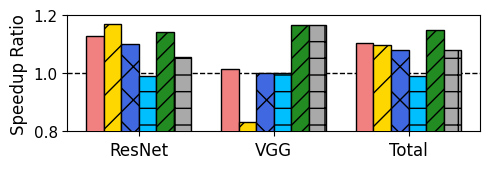

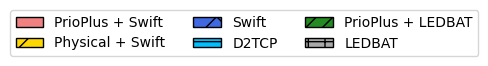

In [ ]:
hatches = ['', '/', 'x', '-', '//', '+']
colors = ['#f18181', '#ffd700', '#4068e1', '#00bfff', '#228b22', '#a9a9a9']

# plot the line figure of average slowdown and p99 slowdown in one figure
fig, ax = plt.subplots(1, 1, figsize=(5, 1.8))

num_groups = 3
num_bars_per_group = 6
# width of each bar
bar_width = 0.13

group_positions = np.arange(num_groups)
bar_positions = [group_positions - (num_bars_per_group - 1) / 2 * bar_width + i * bar_width for i in range(num_bars_per_group)]

index = 0
exp_is = [0, 5, 3, 4, 6, 2]
labels = ["PrioPlus + Swift", "Physical + Swift", "Swift", "D2TCP", "PrioPlus + LEDBAT", "LEDBAT"]
bar_idxs = [1,2,0]
for bar_idx, i in enumerate(exp_is):
    plt.bar(bar_positions[index], [flom_num_group[i][bar_idxs[tmp_i]] for tmp_i in range(3)],
            width=bar_width, linestyle='-', edgecolor='black', hatch=hatches[index], color=colors[index], label=labels[index], zorder = 1111)
    # plt.bar(bar_positions[index], p99_priority_slowdowns[i], width=bar_width, linestyle='-', edgecolor='black', hatch=hatches[index], color=colors[index], alpha=0.3)
    # plt.bar(bar_positions[index], avg_priority_slowdowns[i], width=bar_width, linestyle='-', edgecolor='black', hatch=hatches[index], color=colors[index], label=experiment_names[i])
    index += 1

# for bar_idx, i in enumerate(exp_is):
#     for pos, value in zip(bar_positions[bar_idx], [flom_num_group[i][bar_idxs[tmp_i]] for tmp_i in range(3)]):
#         if value < 1:
#             print(pos, value)
#             ax.text(pos, 1, f'{value:.2f}', color='black', ha='center', va='bottom', fontsize=8)

# ax.set_title("Average/P99 Slowdown")
# ax.set_xlabel("Flow Type")
ax.set_ylabel("Speedup Ratio", fontsize=12)
# # legend in two row
# ax.legend(ncol=2)
# 将legend按照2行3列存储在额外的图片figures/legend.png中
# ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)

ax.set_xticks(range(3))
xticklabels = ["ResNet", "VGG", "Total"]
ax.set_xticklabels(xticklabels)
# ax.grid()

# log scale
# ax.set_yscale("log")
ax.tick_params(axis='x', which='major', labelsize=12)
ax.tick_params(axis='y', which='major', labelsize=11)
ax.set_ylim(0.8,1.2)
# add grid但是不用覆盖bar
# ax.grid(axis='y', linestyle='--', zorder = 0)
# 加一条y=1的横线
ax.axhline(y=1, color='black', linewidth=1, linestyle='--')


plt.tight_layout()

# save as pdf
plt.savefig("../figures/fig12c.pdf", bbox_inches='tight', dpi=600, format='pdf')

fig_legend, ax_legend = plt.subplots(1, 1, figsize=(6, 0.5))
ax_legend.axis('off')
# ax_legend.legend(handles = [plt.Line2D([0], [0], color=colors[i], label=labels[i]) for i in range(len(labels))], loc='center', ncol=3)
ax_legend.legend(*ax.get_legend_handles_labels(), loc='center', ncol=3)

fig_legend.savefig("../figures/fig12c-legend.pdf", bbox_inches='tight', dpi=600, format='pdf')